In [1]:
# train models (without bayesian approach)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read dataset
df = pd.read_csv("../data/BankChurners.csv")

In [4]:
# remove client number and strange classifier columns
df = df.drop([df.columns[0], df.columns[-2], df.columns[-1]], axis=1)

In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
# encode ordinal value
mapping_income = {"Unknown": 0,
                  "Less than $40K": 1,
                  "$40K - $60K": 2,
                  "$60K - $80K": 3,
                  "$80K - $120K": 4,
                  "$120K +": 5}

mapping_edu = {"Unknown": 0,
              "Uneducated": 1,
              "High School": 2,
              "College": 3,
              "Graduate": 4,
              "Post-Graduate": 5,
              "Doctorate": 6
              }


df["Income_Category"] = df["Income_Category"].map(mapping_income)
df["Education_Level"] = df["Education_Level"].map(mapping_income)

In [7]:
# encode binary and nominal variables
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == 'M' else 1)
df["Attrition_Flag"] = df["Attrition_Flag"].apply(lambda x: 0 if x == "Existing Customer" else 1) 
#education_levels = pd.get_dummies(df["Education_Level"], prefix="Education_Level")
marital_statuses = pd.get_dummies(df["Marital_Status"], prefix="Marital_Status")
card_categories = pd.get_dummies(df["Card_Category"], prefix="Card_Category")

In [8]:
# add dummy features to dataframe
df = pd.concat([df, marital_statuses, card_categories], axis=1)

In [9]:
# remove original column from dataframe
df = df.drop(["Education_Level", "Marital_Status", "Card_Category"], axis=1)

In [10]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,3,39,5,1,3,12691.0,...,1.625,0.061,0,1,0,0,1,0,0,0
1,0,49,1,5,1,44,6,1,2,8256.0,...,3.714,0.105,0,0,1,0,1,0,0,0
2,0,51,0,3,4,36,4,1,0,3418.0,...,2.333,0.000,0,1,0,0,1,0,0,0
3,0,40,1,4,1,34,3,4,1,3313.0,...,2.333,0.760,0,0,0,1,1,0,0,0
4,0,40,0,3,3,21,5,1,0,4716.0,...,2.500,0.000,0,1,0,0,1,0,0,0


In [11]:
#create correlation matrix
corr = df.corr()

In [12]:
# select a few features that are correlated with the target (Attrition - flag)
threshold = 0.01

In [13]:
# skip the first value, as it's the correlation of the target with itself
features = corr.iloc[:, 0][corr.iloc[:, 0].abs() >= threshold].index

In [14]:
df_selected = df[features]

In [15]:
df_selected.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Card_Category_Platinum
0,0,45,0,3,3,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1,0,0
1,0,49,1,5,1,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0,1,0
2,0,51,0,3,4,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1,0,0
3,0,40,1,4,1,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,0,0,0
4,0,40,0,3,3,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,1,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop("Attrition_Flag", axis=1),
                                                    df_selected["Attrition_Flag"],
                                                    test_size=0.2)

In [19]:
numerical_features = df_selected.mean()[df_selected.mean() > 5].index

In [20]:
scaler.fit(X_train[numerical_features])

StandardScaler()

In [21]:
X_train[numerical_features] = scaler.transform(X_train[numerical_features])

In [22]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier()

In [24]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
from sklearn.metrics import precision_score, recall_score, average_precision_score

In [26]:
print("Precision: ", precision_score(lr.predict(X_test), y_test))
print("Recall: ", recall_score(lr.predict(X_test), y_test))
print("Average precision:", average_precision_score(y_test, lr.predict_proba(X_test)[:, 1]))

Precision:  0.5497076023391813
Recall:  0.7800829875518672
Average precision: 0.7592833048283227


In [27]:
print("Precision: ", precision_score(knn.predict(X_test), y_test))
print("Recall: ", recall_score(knn.predict(X_test), y_test))
print("Average precision:", average_precision_score(y_test, knn.predict_proba(X_test)[:, 1]))

Precision:  0.6081871345029239
Recall:  0.7732342007434945
Average precision: 0.6624785869600899


In [28]:
print("Precision: ", precision_score(dt.predict(X_test), y_test))
print("Recall: ", recall_score(dt.predict(X_test), y_test))
print("Average precision:", average_precision_score(y_test, dt.predict_proba(X_test)[:, 1]))

Precision:  0.7953216374269005
Recall:  0.7884057971014493
Average precision: 0.6615870285993919


In [29]:
# look at model weights
lr_coefs = pd.DataFrame(lr.coef_[0], columns=["coef"])
lr_coefs.index = features[1:]

<AxesSubplot:>

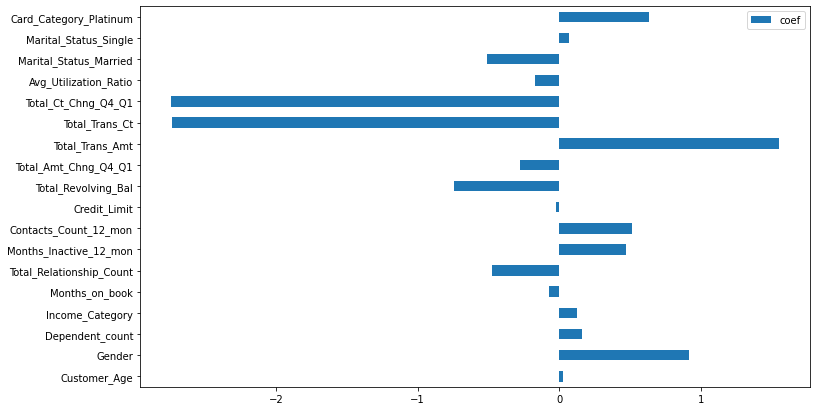

In [30]:
f, ax = plt.subplots()
f.set_size_inches(12,7)
lr_coefs.plot.barh(ax=ax)

In [31]:
# look at model weights
dt_imp = pd.DataFrame(dt.feature_importances_, columns=["feature importance"])
dt_imp.index = features[1:]

<AxesSubplot:>

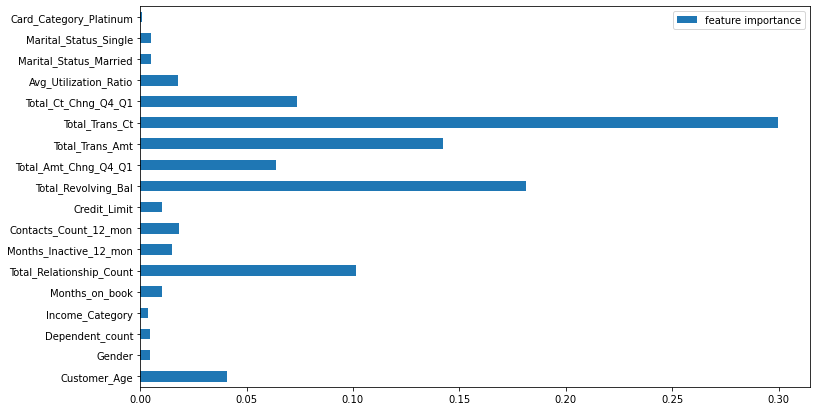

In [32]:
f, ax = plt.subplots()
f.set_size_inches(12,7)
dt_imp.plot.barh(ax=ax)